## Treinamento de Rede Neural Convolucional para Classificação de Imagens do Dataset MNIST

Notebook dedicado ao treinamento e teste de uma Rede Neural Convolucional para a classificação de algarismos escrito a mão da base de dados MNIST.

O script deve apresentar uma arquitetura válida de rede neural convolucional e acurácia maior que 95% no dataset MNIST (conjunto de treino) com apenas 3 épocas.

#### Importações de bibliotecas necessárias

In [26]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

## Carregando o dataset

In [27]:
(imagens_treino, ids_treino), (imagens_teste, ids_teste) = mnist.load_data()

### Exemplo de imagem do conjunto de treino

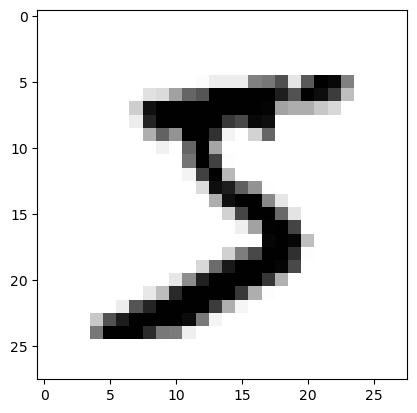

In [28]:
plt.imshow(imagens_treino[0],cmap=plt.cm.binary)
plt.show()

## Exemplo de imagens do conjunto de teste

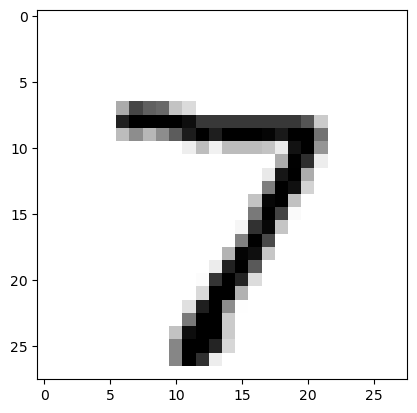

In [29]:
plt.imshow(imagens_teste[0],cmap=plt.cm.binary)
plt.show()

## Normalização das imagens de treino e teste

In [30]:
imagens_treino = (imagens_treino / 255.0)
imagens_teste = (imagens_teste / 255.0)

## Configurando o MLP

In [31]:
model3 = tf.keras.models.Sequential()  # a basic feed-forward model
model3.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model3.add(tf.keras.layers.Dense(128, input_dim=784, activation="relu"))  # a simple fully-connected layer, 128 units, relu activation
model3.add(tf.keras.layers.Dense(128, activation="relu"))  # a simple fully-connected layer, 128 units, relu activation
model3.add(tf.keras.layers.Dense(10, activation="softmax"))  # our output layer. 10 units for 10 classes. Softmax for probability distribution


In [34]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Treinando

In [36]:
model3.fit(imagens_treino, ids_treino, epochs=3, validation_data=(imagens_teste, ids_teste))

Epoch 1/3
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2312 - accuracy: 0.9308 - val_loss: 0.1198 - val_accuracy: 0.9641
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0992 - accuracy: 0.9700 - val_loss: 0.0958 - val_accuracy: 0.9684
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0677 - accuracy: 0.9786 - val_loss: 0.0790 - val_accuracy: 0.9769


## Testando o resultado

In [38]:
loss_teste, acuracia_teste = model3.evaluate(imagens_teste, ids_teste, verbose=2)
print("Acurácia para o conjunto de teste: ", acuracia_teste)

313/313 - 1s - loss: 0.0790 - accuracy: 0.9769 - 968ms/epoch - 3ms/step
Acurácia para o conjunto de teste:  0.9768999814987183


### Predição de imagens

1/1 [==============================] - 0s 19ms/step


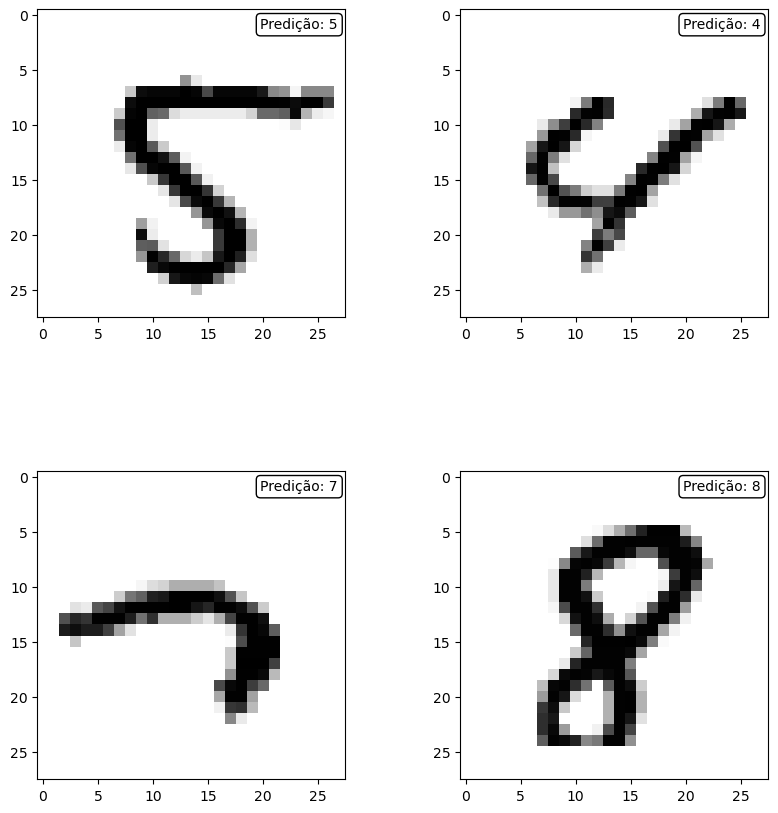

In [52]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Escolher aleatoriamente 4 imagens do conjunto de teste MNIST
random_indices = random.sample(range(len(imagens_teste)), 4)

# Configurar a grade de plotagem
plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)

for i, random_index in enumerate(random_indices, 1):
    # Selecionar uma imagem aleatória e fazer a predição
    imagem_aleatoria = imagens_teste[random_index]
    imagem_aleatoria_reshaped = imagem_aleatoria.reshape(1, 28, 28, 1)
    predicoes = model3.predict(imagem_aleatoria_reshaped)
    id_predita = np.argmax(predicoes)

    # Plotar a imagem
    plt.subplot(2, 2, i)
    plt.imshow(imagem_aleatoria.reshape(28, 28), cmap=plt.cm.binary)
 
   # Adicionar a predição como anotação
    plt.annotate(
        f'Predição: {id_predita}',
        xy=(0.85, 0.95),
        xycoords='axes fraction',
        ha='center',
        va='center',
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white')
    )

# Exibir a grade de plotagem
plt.show()